# Final Project Notebook

In this notebook, we will:
1. Use **yfinance** to extract Tesla and GameStop stock data.
2. Use **webscraping** (with BeautifulSoup) to extract Tesla and GameStop revenue data.
3. Plot the stock data using a custom `make_graph` function.
4. Provide screenshots (answers) for each question.

---


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL actualizada para los ingresos de Tesla en Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Agregar encabezados para simular un navegador
headers = {"User-Agent": "Mozilla/5.0"}

# Obtener el contenido de la página
response = requests.get(url, headers=headers)
if response.status_code != 200:
    print("Error al acceder a la página:", response.status_code)
else:
    html = response.text

    # Parsear el HTML con BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")
    
    # Encontrar todas las tablas en la página
    tables = soup.find_all("table")
    print("Número de tablas encontradas:", len(tables))
    
    if len(tables) == 0:
        print("No se encontró ninguna tabla en la página.")
    else:
        # En Macrotrends, la tabla de ingresos suele ser la primera de las encontradas, pero verifica la estructura.
        table = tables[0]
        rows = table.find_all("tr")
        print("Número de filas encontradas:", len(rows))
        
        data = []
        # Iterar sobre las filas y extraer los datos (asumiendo que la tabla tiene dos columnas: Date y Revenue)
        for row in rows:
            cols = row.find_all("td")
            cols = [col.get_text(strip=True) for col in cols]
            if cols:  # Solo añadir filas que contengan datos
                data.append(cols)
        
        # Mostrar los datos extraídos para depuración
        print("Datos extraídos:")
        for r in data:
            print(r)
        
        # Verifica que la estructura de datos sea la esperada antes de crear el DataFrame
        if data and len(data[0]) >= 2:
            tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
            # Mostrar las últimas 5 filas
            print(tesla_revenue.tail())
        else:
            print("La estructura de la tabla no es la esperada.")


Número de tablas encontradas: 6
Número de filas encontradas: 17
Datos extraídos:
['2024', '$97,690']
['2023', '$96,773']
['2022', '$81,462']
['2021', '$53,823']
['2020', '$31,536']
['2019', '$24,578']
['2018', '$21,461']
['2017', '$11,759']
['2016', '$7,000']
['2015', '$4,046']
['2014', '$3,198']
['2013', '$2,013']
['2012', '$413']
['2011', '$204']
['2010', '$117']
['2009', '$112']
    Date Revenue
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117
15  2009    $112


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL actualizada para los ingresos de GameStop en Macrotrends
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Agregar encabezados para simular un navegador
headers = {"User-Agent": "Mozilla/5.0"}

# Obtener el contenido de la página
response = requests.get(url_gme, headers=headers)
if response.status_code != 200:
    print("Error al acceder a la página:", response.status_code)
else:
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    
    # Encontrar todas las tablas en la página
    tables = soup.find_all("table")
    print("Número de tablas encontradas:", len(tables))
    
    if len(tables) == 0:
        print("No se encontró ninguna tabla en la página.")
    else:
        # Seleccionar la tabla que contiene los datos (usualmente la primera)
        table = tables[0]
        rows = table.find_all("tr")
        print("Número de filas encontradas:", len(rows))
        
        data = []
        # Iterar sobre las filas y extraer los datos (se asume que la tabla tiene dos columnas: Date y Revenue)
        for row in rows:
            cols = row.find_all("td")
            cols = [col.get_text(strip=True) for col in cols]
            if cols:  # Solo añadir filas que contengan datos
                data.append(cols)
        
        # Verificar y mostrar los datos extraídos
        if data and len(data[0]) >= 2:
            gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
            # Mostrar las últimas 5 filas
            print(gme_revenue.tail())
        else:
            print("La estructura de la tabla no es la esperada.")


Número de tablas encontradas: 6
Número de filas encontradas: 17
    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


## Question 1: Use yfinance to Extract Stock Data (Tesla)

**Task**: 
- Create a `Ticker` object for Tesla (TSLA).
- Extract stock information using `history(period="max")` and save it in `tesla_data`.
- Reset the index and display the first five rows of the `tesla_data` dataframe using `head()`.




In [ ]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

**Task**:
- Webscrape the Tesla revenue data and store it in a dataframe called `tesla_revenue`.
- Display the last five rows of this dataframe using `tail()`.



In [ ]:
tesla_revenue.tail()



,Date,Revenue
11,2013,"$2,013"
12,2012,$413
13,2011,$204
14,2010,$117
15,2009,$112


## Question 3: Use yfinance to Extract Stock Data (GameStop)

**Task**: 
- Create a `Ticker` object for GameStop (GME).
- Extract stock information using `history(period="max")` and save it in `gme_data`.
- Reset the index and display the first five rows of the `gme_data` dataframe using `head()`.

**Upload File**:  
Include a screenshot of the code and results here.


In [ ]:
import yfinance as yf

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

**Task**:
- Webscrape the GameStop revenue data and store it in a dataframe called `gme_revenue`.
- Display the last five rows of this dataframe using `tail()`.

**Upload File**:  
Include a screenshot of your results below.


In [28]:
# Mostrar las últimas 5 filas del DataFrame de ingresos de GME
gme_revenue.tail()


,Date,Revenue
11,2013,"$8,887"
12,2012,"$9,551"
13,2011,"$9,474"
14,2010,"$9,078"
15,2009,"$8,806"


## Question 5: Plot Tesla Stock Graph

**Task**: 
- Define and use the `make_graph` function to graph the Tesla stock data.
- Provide a title for the graph.
- Upload a screenshot of your results.


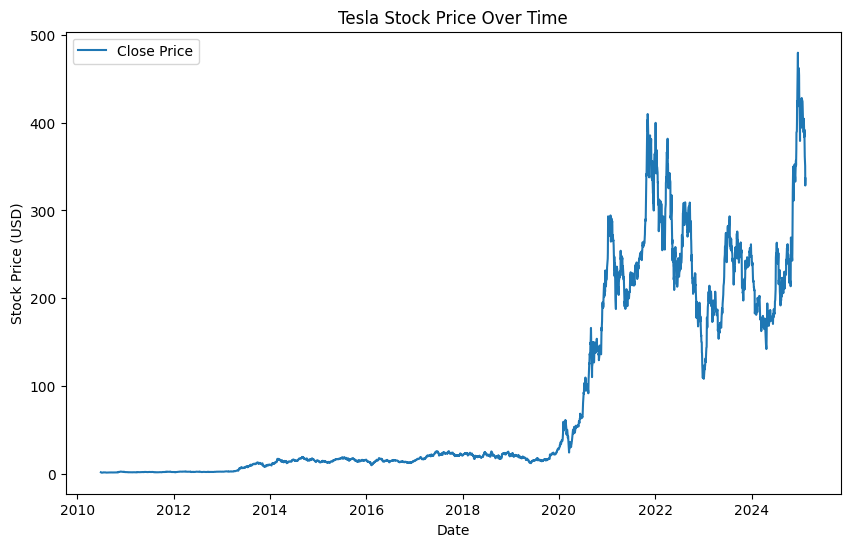

In [ ]:

import matplotlib.pyplot as plt

def make_graph(dataframe, title):
    """
    Plots the 'Close' price of a given stock dataframe over 'Date'.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Date'], dataframe['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.show()

# Convert Date column to datetime if not already
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

make_graph(tesla_data, "Tesla Stock Price Over Time")


## Question 6: Plot GameStop Stock Graph

**Task**:
- Use the same `make_graph` function to graph the GameStop stock data.
- Provide a title for the graph.
- Upload a screenshot of your results.


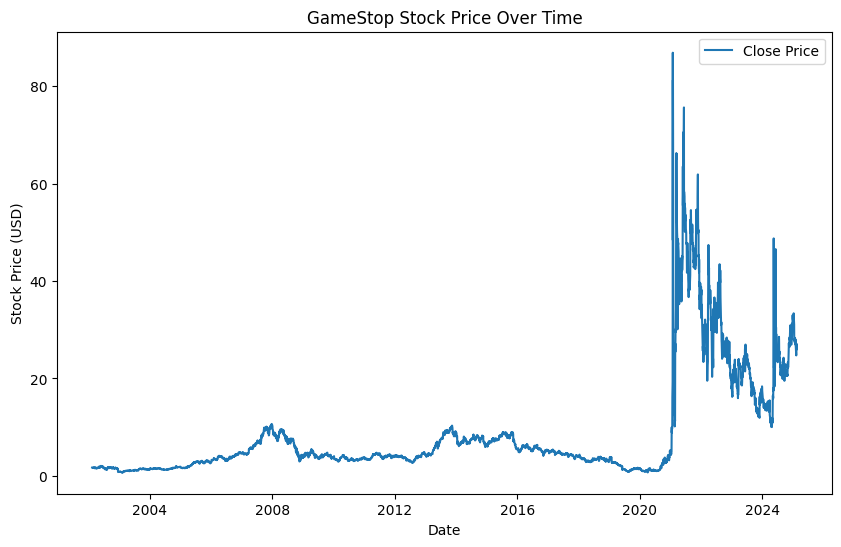

In [17]:
# Convert Date column to datetime if not already
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

make_graph(gme_data, "GameStop Stock Price Over Time")
